# Time series in pandas
In this chapter, you will learn how to manipulate and visualize time series data using Pandas. You will become familiar with concepts such as upsampling, downsampling, and interpolation. You will practice using Pandas' method chaining to efficiently filter your data and perform time series analyses. From stock prices to flight timings, time series data are found in a wide variety of domains and being able to effectively work with such data can be an invaluable skill.

# 1. Indexing pandas time series
## 1.1 Creating and using a DatetimeIndex
The pandas Index is a powerful way to handle time series data, so it is valuable to know how to build one yourself. Pandas provides the `pd.to_datetime()` function for just this task. For example, if passed the list of strings `['2015-01-01 091234','2015-01-01 091234']` and a `format` specification variable, such as `format='%Y-%m-%d %H%M%S`, pandas will parse the string into the proper datetime elements and build the datetime objects.

In this exercise, a list of temperature data and a list of date strings has been pre-loaded for you as `temperature_list` and `date_list` respectively. Your job is to use the `.to_datetime()` method to build a DatetimeIndex out of the list of date strings, and to then use it along with the list of temperature data to build a pandas Series.

### Instructions:
* Prepare a format string, `time_format`, using `'%Y-%m-%d %H:%M'` as the desired format.
* Convert `date_list` into a `datetime` object by using the `pd.to_datetime()` function. Specify the format string you defined above and assign the result to `my_datetimes`.
* Construct a pandas Series called `time_series` using `pd.Series()` with `temperature_list` and `my_datetimes`. Set the `index` of the Series to be `my_datetimes`.

In [1]:
import pandas as pd

# Load dataframe
df_weather = pd.read_csv('_datasets/weather_data_austin_2010.csv')

# Dataframe columns to list
temperature_list = df_weather['Temperature'].values.tolist()
date_list = df_weather['Date'].values.tolist()

In [2]:
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)

print(my_datetimes)

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-12-31 14:00:00', '2010-12-31 15:00:00',
               '2010-12-31 16:00:00', '2010-12-31 17:00:00',
               '2010-12-31 18:00:00', '2010-12-31 19:00:00',
               '2010-12-31 20:00:00', '2010-12-31 21:00:00',
               '2010-12-31 22:00:00', '2010-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8759, freq=None)


In [3]:
print(time_series.head())
print('***')
print(time_series.tail())

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64
***
2010-12-31 19:00:00    51.1
2010-12-31 20:00:00    49.0
2010-12-31 21:00:00    47.9
2010-12-31 22:00:00    46.9
2010-12-31 23:00:00    46.2
dtype: float64


Next to `DataFrames`, `Series` are another important object that `pandas` allows us to create, and they're very convenient for time series data.

## 1.2 Partial string indexing and slicing
Pandas time series support "partial string" indexing. What this means is that even when passed only a portion of the datetime, such as the date but not the time, pandas is remarkably good at doing what one would expect. Pandas datetime indexing also supports a wide variety of commonly used datetime string formats, even when mixed.

In this exercise, a time series that contains hourly weather data has been pre-loaded for you. This data was read using the `parse_dates=True` option in `read_csv()` with `index_col="Dates"` so that the Index is indeed a `DatetimeIndex`.

All data from the `'Temperature'` column has been extracted into the variable `ts0`. Your job is to use a variety of natural date strings to extract one or more values from `ts0`.

After you are done, you will have three new variables - `ts1`, `ts2`, and `ts3`. You can slice these further to extract only the first and last entries of each. Try doing this after your submission for more practice.

### Instructions:
* Extract data from `ts0` for a single hour - the hour from 9pm to 10pm on `2010-10-11`. Assign it to `ts1`.
* Extract data from `ts0` for a single day - `July 4th, 2010` - and assign it to `ts2`.
* Extract data from `ts0` for the second half of December 2010 - `12/15/2010` to `12/31/2010`. Assign it to `ts3`.

In [4]:
# Dataframe columns to list
temperature_list = df_weather['Temperature'].values.tolist()
date_list = df_weather['Date'].values.tolist()

# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'
# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)
# Construct a pandas Series using temperature_list and my_datetimes: time_series
ts0 = pd.Series(temperature_list, index=my_datetimes)

In [5]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']
print('*** ts1:')
print(ts1)

*** ts1:
2010-10-11 21:00:00    69.0
2010-10-11 22:00:00    67.7
dtype: float64


In [6]:
print('*** ts2:')
# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['July 4th, 2010']
print(ts2.head())
print(ts2.tail())

*** ts2:
2010-07-04 00:00:00    77.6
2010-07-04 01:00:00    76.3
2010-07-04 02:00:00    75.5
2010-07-04 03:00:00    74.9
2010-07-04 04:00:00    74.6
dtype: float64
2010-07-04 19:00:00    87.3
2010-07-04 20:00:00    84.0
2010-07-04 21:00:00    81.8
2010-07-04 22:00:00    80.0
2010-07-04 23:00:00    78.5
dtype: float64


In [7]:
print('*** ts3:')
# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['12/15/2010':'12/31/2010']
print(ts3.head())
print(ts3.tail())

*** ts3:
2010-12-15 00:00:00    48.0
2010-12-15 01:00:00    47.2
2010-12-15 02:00:00    46.5
2010-12-15 03:00:00    46.0
2010-12-15 04:00:00    45.6
dtype: float64
2010-12-31 19:00:00    51.1
2010-12-31 20:00:00    49.0
2010-12-31 21:00:00    47.9
2010-12-31 22:00:00    46.9
2010-12-31 23:00:00    46.2
dtype: float64


## 1.3 Reindexing the Index
Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with `NaN` by default.

In this exercise, two time series data sets containing daily data have been pre-loaded for you, each indexed by dates. The first, `ts1`, includes weekends, but the second, `ts2`, does not. The goal is to combine the two data sets in a sensible way. Your job is to reindex the second data set so that it has weekends as well, and then add it to the first. When you are done, it would be informative to inspect your results.

### Instructions:
* Create a new time series `ts3` by reindexing `ts2` with the index of `ts1`. To do this, call `.reindex()` on `ts2` and pass in the index of `ts1` (`ts1.index`).
* Create another new time series, `ts4`, by calling the same `.reindex()` as above, but also specifiying a fill method, using the keyword argument `method="ffill"` to forward-fill values.
* Add `ts1 + ts2`. Assign the result to `sum12`.
* Add `ts1 + ts3`. Assign the result to `sum13`.
* Add `ts1 + ts4`, Assign the result to `sum14`.

In [8]:
# Prepare a dataframe1 including weekends
days1 = ['20160701', '20160702', '20160703', '20160704', '20160705', '20160706', '20160707', '20160708', '20160709',
         '20160710', '20160711', '20160712', '20160713', '20160714', '20160715', '20160716', '20160717']
time_format = '%Y-%m-%d'
days1 = pd.to_datetime(days1, format=time_format)
value1 = [i for i in range(17)]
ts1 = pd.Series(value1, index=days1)

# Prepare a dataframe2 without weekends
days2 = ['20160701', '20160704', '20160705', '20160706', '20160707', '20160708', '20160711', '20160712', '20160713',
         '20160714', '20160715']
time_format = '%Y-%m-%d'
days2 = pd.to_datetime(days2, format=time_format)
value2 = [i for i in range(11)]
ts2 = pd.Series(value2, index=days2)

In [9]:
# *****************************
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)
print('ts3:')
print(ts3)

ts3:
2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     1.0
2016-07-05     2.0
2016-07-06     3.0
2016-07-07     4.0
2016-07-08     5.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11     6.0
2016-07-12     7.0
2016-07-13     8.0
2016-07-14     9.0
2016-07-15    10.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64


In [10]:
# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method='ffill')
print('ts4:')
print(ts4)

ts4:
2016-07-01     0
2016-07-02     0
2016-07-03     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-09     5
2016-07-10     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
2016-07-16    10
2016-07-17    10
dtype: int64


In [11]:
# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2
print('sum12:')
print(sum12)

sum12:
2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     4.0
2016-07-05     6.0
2016-07-06     8.0
2016-07-07    10.0
2016-07-08    12.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    16.0
2016-07-12    18.0
2016-07-13    20.0
2016-07-14    22.0
2016-07-15    24.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64


In [12]:
# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3
print('sum13:')
print(sum13)

sum13:
2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     4.0
2016-07-05     6.0
2016-07-06     8.0
2016-07-07    10.0
2016-07-08    12.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    16.0
2016-07-12    18.0
2016-07-13    20.0
2016-07-14    22.0
2016-07-15    24.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64


In [13]:
# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4
print('sum14:')
print(sum14)

sum14:
2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     4
2016-07-05     6
2016-07-06     8
2016-07-07    10
2016-07-08    12
2016-07-09    13
2016-07-10    14
2016-07-11    16
2016-07-12    18
2016-07-13    20
2016-07-14    22
2016-07-15    24
2016-07-16    25
2016-07-17    26
dtype: int64


# 2. Resampling pandas time series
## 2.1 Resampling and frequency
Pandas provides methods for resampling time series data. When downsampling or upsampling, the syntax is similar, but the methods called are different. Both use the concept of 'method chaining' - `df.method1().method2().method3()` - to direct the output from one method call to the input of the next, and so on, as a sequence of operations, one feeding into the next.

For example, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in `df.resample('D').mean()`.

In this exercise, a data set containing hourly temperature data has been pre-loaded for you. Your job is to resample the data using a variety of aggregation methods to answer a few questions.

### Instructions:
* Downsample the `'Temperature'` column of `df` to 6 hour data using `.resample('6h')` and `.mean()`. Assign the result to `df1`.
* Downsample the `'Temperature'` column of `df` to daily data using `.resample('D')` and then count the number of data points in each day with `.count()`. Assign the result `df2`.

In [14]:
# Load dataframe
df_weather = pd.read_csv('_datasets/weather_data_austin_2010.csv')
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'
# Convert date_list into a datetime object: my_datetimes
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format=time_format)
# Set Date as index
df_weather.set_index('Date', inplace=True)

In [15]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df_weather['Temperature'].resample('6h').mean()
print(df1.head(), '\n')

# Downsample to daily data and count the number of data points: df2
df2 = df_weather['Temperature'].resample('D').count()
print(df2.head())

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64 

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64


## 2.2 Separating and resampling
With pandas, you can resample in different ways on different subsets of your data. For example, resampling different months of data with different aggregations. In this exercise, the data set containing hourly temperature data from the last exercise has been pre-loaded.

Your job is to resample the data using a variety of aggregation methods. The DataFrame is available in the workspace as `df`. You will be working with the `'Temperature'` column.

### Instructions:
* Use partial string indexing to extract temperature data for August 2010 into `august`.
* Use the temperature data for August and downsample to find the daily maximum temperatures. Store the result in `august_highs`.
* Use partial string indexing to extract temperature data for February 2010 into `february`.
* Use the temperature data for February and downsample to find the daily minimum temperatures. Store the result in `february_lows`.

In [16]:
# Extract temperature data for August: august
august = df_weather['Temperature'].loc['2010-08']
print('*** August ***')
print(august.head(), '\n')
print(august.tail())

*** August ***
Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64 

Date
2010-08-31 19:00:00    86.6
2010-08-31 20:00:00    83.4
2010-08-31 21:00:00    81.2
2010-08-31 22:00:00    79.7
2010-08-31 23:00:00    78.2
Name: Temperature, dtype: float64


In [17]:
# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()
print('*** August_highs***')
print(august_highs.head(), '\n')
print(august_highs.tail())

*** August_highs***
Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64 

Date
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64


In [18]:
# Extract temperature data for February: february
february = df_weather['Temperature'].loc['2010-02']
print('*** February ***')
print(february.head(), '\n')
print(february.tail())

*** February ***
Date
2010-02-01 00:00:00    47.8
2010-02-01 01:00:00    46.8
2010-02-01 02:00:00    46.1
2010-02-01 03:00:00    45.5
2010-02-01 04:00:00    44.9
Name: Temperature, dtype: float64 

Date
2010-02-28 19:00:00    60.9
2010-02-28 20:00:00    58.2
2010-02-28 21:00:00    56.4
2010-02-28 22:00:00    54.9
2010-02-28 23:00:00    53.6
Name: Temperature, dtype: float64


In [19]:
# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()
print('*** February_lows ***')
print(february_lows.head(), '\n')
print(february_lows.tail())

*** February_lows ***
Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64 

Date
2010-02-24    48.1
2010-02-25    48.4
2010-02-26    48.5
2010-02-27    48.6
2010-02-28    48.6
Freq: D, Name: Temperature, dtype: float64


## 2.3 Rolling mean and frequency
In this exercise, some hourly weather data is pre-loaded for you. You will continue to practice resampling, this time using rolling means.

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. You can read more about them [here](https://en.wikipedia.org/wiki/Moving_average).

To use the `.rolling()` method, you must always use method chaining, first calling `.rolling()` and then chaining an aggregation method after it. For example, with a Series `hourly_data`, `hourly_data.rolling(window=24).mean()` would compute new values for each hourly point, based on a 24-hour window stretching out __behind__ each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.

Your job is to resample the data using the combination of `.rolling()` and `.mean()`. You will work with the same DataFrame `df` from the previous exercise.

### Instructions:
* Use partial string indexing to extract temperature data from August 1 2010 to August 15 2010. Assign to `unsmoothed`.
* Use `.rolling()` with a 24 hour window to smooth the mean temperature data. Assign the result to `smoothed`.
* Use a dictionary to create a new DataFrame `august` with the time series `smoothed` and `unsmoothed` as columns.
* Plot both the columns of `august` as line plots using the `.plot()` method.

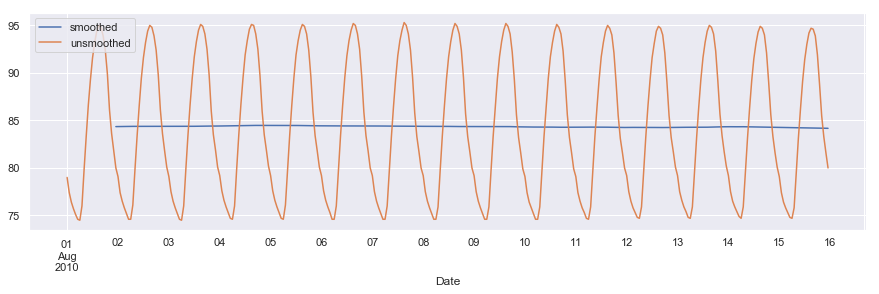

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Set plot size
plt.rcParams['figure.figsize'] = [15, 4]

# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df_weather['Temperature']['2010-Aug-01':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

## 2.4 Resample and roll with it
As of pandas version 0.18.0, the interface for applying rolling transformations to time series has become more consistent and flexible, and feels somewhat like a `groupby`.

You can now flexibly chain together resampling and rolling operations. In this exercise, the same weather data from the previous exercises has been pre-loaded for you. Your job is to extract one month of data, resample to find the daily high temperatures, and then use a rolling and aggregation operation to smooth the data.

### Instructions:
* Use partial string indexing to extract August 2010 temperature data, and assign to `august`.
* Resample to daily frequency, saving the maximum daily temperatures, and assign the result to `daily_highs`.
* As part of one long method chain, repeat the above resampling (or you can re-use `daily_highs`) and then combine it with `.rolling()` to apply a 7 day `.mean()` (with `window=7` inside `.rolling()`) so as to smooth the daily highs. Assign the result to `daily_highs_smoothed` and print the result.

In [21]:
# Extract the August 2010 data: august
august = df_weather['Temperature']['2010-08']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


# 3. Manipulating pandas time series
## 3.1 Method chaining and filtering
We've seen that pandas supports method chaining. This technique can be very powerful when cleaning and filtering data.

In this exercise, a DataFrame containing flight departure data for a single airline and a single airport for the month of July 2015 has been pre-loaded. Your job is to use `.str()` filtering and method chaining to generate summary statistics on flight delays each day to Dallas.

### Instructions:
* Use .str.strip() to strip extra whitespace from df.columns. Assign the result back to df.columns.
* In the 'Destination Airport' column, extract all entries where Dallas ('DAL') is the destination airport. Use .str.contains('DAL') for this and store the result in dallas.
* Resample dallas such that you get the total number of departures each day. Store the result in daily_departures.
* Generate summary statistics for daily Dallas departures using .describe(). Store the result in stats.

In [22]:
# Load dataframe from file and skiprows with description
df_airport = pd.read_csv('_datasets/austin_airport_departure_data_2015_july.csv', skiprows=15)
# Convert column to datatime and set as index
df_airport['Date (MM/DD/YYYY)'] = pd.to_datetime(df_airport['Date (MM/DD/YYYY)'], format='%m/%d/%Y')
df_airport.set_index('Date (MM/DD/YYYY)', inplace=True)

In [23]:
# Strip extra whitespace from the column names: df.columns
df_airport.columns = df_airport.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = df_airport['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()

print(stats)

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64


## 3.2 Missing values and interpolation
One common application of interpolation in data analysis is to fill in missing data.

In this exercise, noisy measured data that has some dropped or otherwise missing values has been loaded. The goal is to compare two time series, and then look at summary statistics of the differences. The problem is that one of the data sets is missing data at some of the times. The pre-loaded data `ts1` has value for all times, yet the data set `ts2` does not: it is missing data for the weekends.

Your job is to first interpolate to fill in the data for all days. Then, compute the differences between the two data sets, now that they both have full support for all times. Finally, generate the summary statistics that describe the distribution of differences.

### Instructions:
* Replace the index of `ts2` with that of `ts1`, and then fill in the missing values of `ts2` by using `.interpolate(how='linear')`. Save the result as `ts2_interp`.
* Compute the difference between `ts1` and `ts2_interp`. Take the absolute value of the difference with `np.abs()`, and assign the result to `differences`.
* Generate and print summary statistics of the `differences` with `.describe()` and `print()`.

In [24]:
import numpy as np

# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')

# Compute the absolute difference of ts1 and ts2_interp: differences
differences = np.abs(ts1 - ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())

count    17.000000
mean      2.882353
std       1.585267
min       0.000000
25%       2.000000
50%       2.666667
75%       4.000000
max       6.000000
dtype: float64


## 3.3 Time zones and conversion
Time zone handling with pandas typically assumes that you are handling the Index of the Series. In this exercise, you will learn how to handle timezones that are associated with datetimes in the column data, and not just the Index.

You will work with the flight departure dataset again, and this time you will select Los Angeles (`'LAX'`) as the destination airport.

Here we will use a mask to ensure that we only compute on data we actually want. To learn more about Boolean masks, click [here](https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html)!

### Instructions:
* Create a Boolean mask, `mask`, such that if the `'Destination Airport'` column of df equals `'LAX'`, the result is `True`, and otherwise, it is `False`.
* Use the mask to extract only the `LAX` rows. Assign the result to `la`.
* Concatenate the two columns `la['Date (MM/DD/YYYY)']` and `la['Wheels-off Time']` with a `' '` space in between. Pass this to `pd.to_datetime()` to create a datetime array of all the times the LAX-bound flights left the ground.
* Use `Series.dt.tz_localize()` to localize the time to `'US/Central'`.
* Use the `.dt.tz_convert()` method to convert datetimes from `'US/Central'` to `'US/Pacific'.

In [25]:
# Re-load dataframe from file and skiprows with description
df_airport = pd.read_csv('_datasets/austin_airport_departure_data_2015_july.csv', skiprows=15)
# Strip extra whitespace from the column names: df.columns
df_airport.columns = df_airport.columns.str.strip()


In [26]:
# Build a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = df_airport['Destination Airport'] == 'LAX'
print('Mask:')
print(mask.head())

Mask:
0    False
1    False
2    False
3    False
4    False
Name: Destination Airport, dtype: bool


In [27]:
# Use the mask to subset the data: la
la = df_airport[mask]
print('LA:')
print(la[['Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number', 'Destination Airport']].head(), '\n')

LA:
    Date (MM/DD/YYYY)  Flight Number Tail Number Destination Airport
33         07/01/2015         1249.0      N430WN                 LAX
55         07/01/2015         4924.0      N757LV                 LAX
91         07/02/2015         1249.0      N570WN                 LAX
113        07/02/2015         4924.0      N379SW                 LAX
134        07/03/2015         1249.0      N487WN                 LAX 



In [28]:
# Combine two columns of data to create a datetime series: times_tz_none
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'] )
print('Time zones none:')
print(times_tz_none.head())

Time zones none:
33    2015-07-01 05:43:00
55    2015-07-01 16:27:00
91    2015-07-02 05:47:00
113   2015-07-02 16:23:00
134   2015-07-03 05:30:00
dtype: datetime64[ns]


In [29]:
# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')
print('Time zones central:')
print(times_tz_central.head())

Time zones central:
33    2015-07-01 05:43:00-05:00
55    2015-07-01 16:27:00-05:00
91    2015-07-02 05:47:00-05:00
113   2015-07-02 16:23:00-05:00
134   2015-07-03 05:30:00-05:00
dtype: datetime64[ns, US/Central]


In [30]:
# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')
print(times_tz_pacific.head())

33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]


# 4. Visualizing pandas time series
## 4.1 Plotting time series, datetime indexing
Pandas handles datetimes not only in your data, but also in your plotting.

In this exercise, some time series data has been pre-loaded. However, we have not parsed the date-like columns nor set the index, as we have done for you in the past!

The plot displayed is how pandas renders data with the default integer/positional index. Your job is to convert the `'Date'` column from a collection of strings into a collection of datetime objects. Then, you will use this converted `'Date'` column as your new index, and re-plot the data, noting the improved datetime awareness. After you are done, you can cycle between the two plots you generated by clicking on the 'Previous Plot' and 'Next Plot' buttons.

Before proceeding, look at the plot shown and observe how pandas handles data with the default integer index. Then, inspect the DataFrame `df` using the `.head()` method in the IPython Shell to get a feel for its structure.

### Instructions:
* Use `pd.to_datetime()` to convert the `'Date'` column to a collection of datetime objects, and assign back to `df.Date`.
* Set the index to this updated `'Date'` column, using `df.set_index()` with the optional keyword argument `inplace=True`, so that you don't have to assign the result back to `df`.
* Re-plot the DataFrame to see that the axis is now datetime aware. This code has been written for you.

In [31]:
# Load dataframe
df_weather = pd.read_csv('_datasets/weather_data_austin_2010.csv')
# Select Date and Temperature columns for exercise and all rows related to Jan 2010.
df_weather = df_weather[['Date', 'Temperature']]
df_weather = df_weather[0:744]

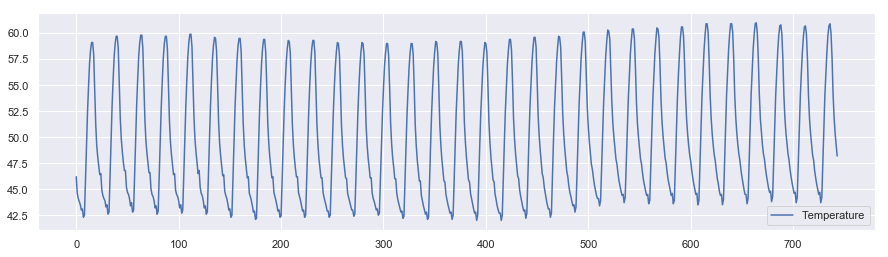

In [32]:
# Set plot size
plt.rcParams['figure.figsize'] = [15, 4]

# Plot the raw data before setting the datetime index
df_weather.plot()
plt.show()

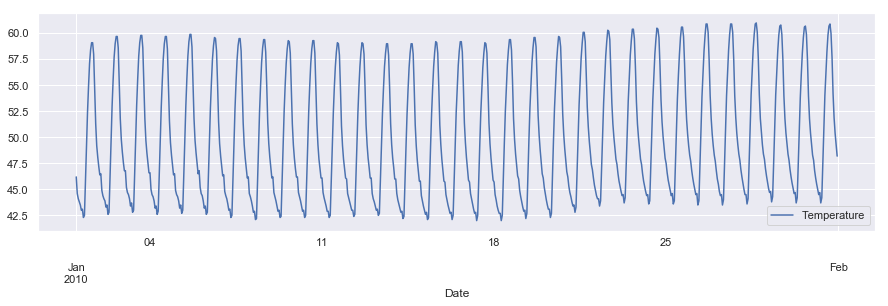

In [33]:
# Set plot size
plt.rcParams['figure.figsize'] = [15, 4]

# Convert the 'Date' column into a collection of datetime objects: df.Date
df_weather.Date = pd.to_datetime(df_weather['Date'])

# Set the index to be the converted 'Date' column
df_weather['Date'] = df_weather.set_index('Date', inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df_weather.plot()
plt.show()

## 4.2 Plotting date ranges, partial indexing
Now that you have set the DatetimeIndex in your DataFrame, you have a much more powerful and flexible set of tools to use when plotting your time series data. Of these, one of the most convenient is partial string indexing and slicing. In this exercise, we've pre-loaded a full year of Austin 2010 weather data, with the index set to be the datetime parsed `'Date'` column as shown in the previous exercise.

Your job is to use partial string indexing of the dates, in a variety of datetime string formats, to plot all the summer data and just one week of data together. After you are done, you can cycle between the two plots by clicking on the 'Previous Plot' and 'Next Plot' buttons.

First, remind yourself how to extract one month of temperature data using `'May 2010'` as a key into `df.Temperature[]`, and call `head()` to inspect the result: `df.Temperature['May 2010'].head()`.

### Instructions:
* Plot the summer temperatures using method chaining. The summer ranges from the months `'2010-Jun'` to `'2010-Aug'`.
* Plot the temperatures for one week in June using the same method chaining, but this time indexing with `'2010-06-10':'2010-06-17'` before you follow up with `.plot()`.

In [34]:
# Load dataframe
df_weather = pd.read_csv('_datasets/weather_data_austin_2010.csv', 
                         usecols=['Date', 'Temperature', 'DewPoint', 'Pressure'])
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather.set_index('Date', inplace=True)

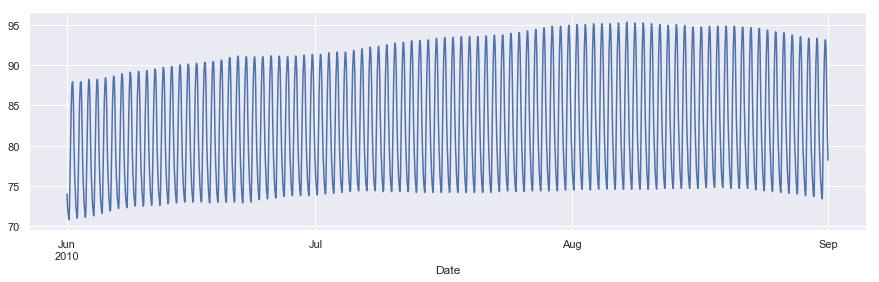

<Figure size 1080x288 with 0 Axes>

In [35]:
# Set plot size
plt.rcParams['figure.figsize'] = [15, 4]

# Plot the summer data
df_weather.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

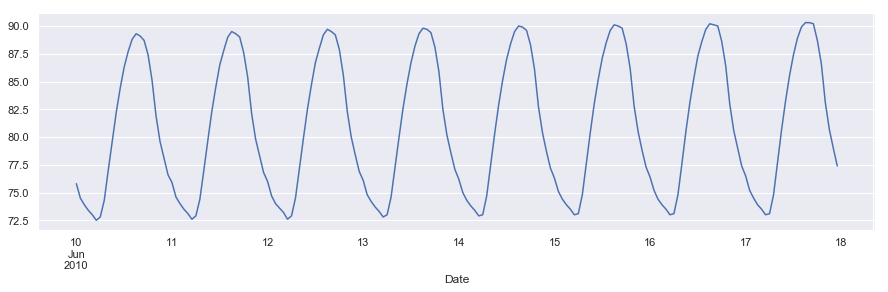

<Figure size 1080x288 with 0 Axes>

In [36]:
# Plot the one week data
df_weather.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()